In [ ]:
pip install  matplotlib seaborn scipy pandas scikit-learn

C:\Users\yoge8\AppData\Local\Temp\ipykernel_3040\3115598782.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = np.array([1, float(x)])  # Add bias for prediction point


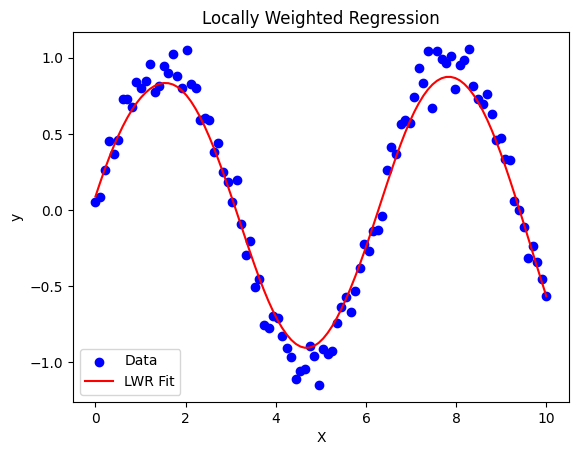

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# LWR implementation
def lwr_predict(X_train, y_train, x, tau=0.5):
    weights = np.exp(-np.sum((X_train - x)**2, axis=1) / (2 * tau**2))
    W = np.diag(weights)
    X_train = np.c_[np.ones(len(X_train)), X_train]  # Add bias term
    x = np.array([1, float(x)])  # Add bias for prediction point
    theta = np.linalg.pinv(X_train.T @ W @ X_train) @ X_train.T @ W @ y_train
    return x @ theta

# Predict for each point
y_pred = [lwr_predict(X, y, x, tau=0.5) for x in X]

# Visualize
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', label='LWR Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Locally Weighted Regression')
plt.legend()
plt.show()